# 21회

## 1. 학생성적 예측 : 분류
- 독립변수 : 11개 (school, sex 등 수치/범주), 타겟변수 : grade
- 단계마다 적합한 시각화 및 근거제시

### 1-1 EDA & 시각화
#### 1-1-1. EDA & 시각화
- ① 데이터 구조 확인
>- df.head(), df.tail() : 데이터의 처음과 마지막 5행 확인
>- df.shape : 데이터 행/열 갯수 확인
>- df.info() : 전체 col명과 데이터 타입 확인
- ② 빈도분석 및 분포분석
>- df.describe(), 변동계수(CV=SD/m: 상대표준편차)) : 연속형 변수 
>- df.groupby(), df.value_counts() : 범주형 변수 
>- 종속변수와 함께 상관관계
>- 첨도/왜도 : 
>>- from scipy.ststs import skew, kurtosis
>>- skew(df['col']), kurtosis(df['col'])
>- 히스토그램 :
>>- import seaborn as sns
>>- sns.histplot(df['col'], kde=True)
>- Boxplot
>>- import matplolib.pyplot as plt
>>- plt.boxplot((df['col'])


####  1-1-2 전처리 중 결측치 확인 방법 및 예측방법 제시 
>- 1) 결측치 : isna().sum()
>>- 가이드 라인 : 
>>>- 10% 미만 : 삭제 or 대치
>>>- 10% ~ 50% : regression or model based imputation
>>>- 50% 이상 : 해당 컬럼(변수) 자체 제거
>>-  삭제 : 
>>>- 행 대상 : dropna()       ※ 행 대상 특정 col삭제 : df.dropna(subset=['col'])
>>>- 열 대상 : dropna(axis=1)  
>>-  대체 : 
>>>- SimpleImputer : mean, median, mode로 대체
>>>>- from sklearn.impute import SimpleImputer
>>>>- si_mean=SimpleImputer(missing_values=np.nan,strategy='mean'):'median' or 'most_frequent'
>>>>- si_mean.fit(df)
>>>>- df1=si_mean.transform(df)
>>>- IterativeImputer : 다변량 대치방법으로 다른 모든 특성에서 각 특성을 추정하는 방법
>>>>- from sklearn.experimental import enable_iterative_imputer
>>>>- from sklearn.impute import IterativeImputer
>>>>- imputer=IterativeImputer()
>>>>- imputer.fit(df)
>>>>- df1=imputer.transform(df)
>>>- KNNImputer : mean/median/mode로 대체하는 것보다 정확, 단점은 메모리를 많이 필요로 하고 이상치에 민감, 이웃갯수 정해야!! 
>>>>- from sklearn.impute import KNNImputer
>>>>- imputer=KNNImputer(n_neighbors=5)
>>>>- imputer.fit(df)
>>>>- df1=imputer.transform(df)
>>>- Zero Imputation : 0으로 대체 : fillna(0)
>>>- Constant Imputation : 지정한 상수 값으로 대체
>- 2) 중복값 : df[df.duplicated(keep=False)]  
>>- 행 제거 : df.drop_duplicates() : 행 내용이 동일한 경우 제거
>>- 열 제거 : df.drop_duplicates(['col'], keep='last') :  col기준 중복값중 마지막만 남겨둠
>- 3) 이상치 : 
>>-  확인 : 
>>>- ESD(Extreme Studentized Deviation) : 평균으로부터 3sigma이상 떨어진 값  
>>>- 기하평균으로 부터 2.5sigma이상 떨어진 값들
>>>- Q1, Q3에서 (1.5xIQR)이상 떨어진 값들
>>>- boxplot을 통해 이상값으로 ㅇ로 표기되는 경우
>>>- DBSCAN 클러스터링을 통해 타겟값이 -1이 되는 경우
>>-  제거 : IQR을 통해 상하한값을 찾은 후  그 너머의 값을 제거하는 방법
>>>- IQR = df['col'].quantile(0.75)-df['col'].quantile(0.25)
>>>- min=df['col'].quantile(0.25)-IQR*1.5
>>>- max=df['col'].quantile(0.75)-IQR*1.5
>>>- out_index=df[['col']].query('col<=min or col>=max).index
>>>- trimmed=df['col'].drop(index=out_index, axis=1)
>>-  대체 : 경계값 너머의 이상치들을 상하한값으로 대체하는 방법
>>>- IQR = df['col'].quantile(0.75)-df['col'].quantile(0.25)
>>>- min=df['col'].quantile(0.25)-IQR*1.5
>>>- max=df['col'].quantile(0.75)-IQR*1.5
>>>- winsorized=df['col'].clip(min, max)

#### 1-1-3 인코딩이 필요한 항목과 이유 제시, 필요한 인코딩 수행 :  범주형 변수/숫자값으로 변환/
>>- 방법1: 레이블인코딩 : 
>>>- 일괄적인 숫자값으로 변환
>>>- 몇몇 ML에서는 숫자의 크기를 반영하므로써 예측 성능을 떨어뜨림
>>>- 선형회귀 ML에는 적용하면 안됨, 그러나 트리기반 ML에는 적용 가능
>>>-from sklearn.preprocessing import LabelEncoder
>>>-le=LabelEncoder()
>>>-le.fit(df)
>>>-labels=le.transform(df)
>>- 방법2 : 원핫인코딩
>>>- 피처값의 유형에 따라 새로운 피처를 추가해 고윳값에 해당하는 컬러에만 1을 나머지는 0을 표시
>>>- import pandas as pd
>>>- pd.get_dummies(df)

### 1-2 데이터셋 분할  

#### 분할방법

1. 일반적인 데이터 분할
>- 일반적으로 데이터 분할은 train data(70%), test data(30%)로 비율에 따라 랜덤으로 데이터를 분할.
>>- from sklearn.model_selection import train_test_split

2. K-fold 교차분석 (k-fold cross validation)
>- 데이터를 k개의 집단으로 나눈 뒤 k-1개의 집단으로 분류기를 학습시키고, 나머지 1개의 집단으로 분류기의 성능을 테스트하는 방법이다. 이 과정을 k번 반복한다.

3. 층화 K-fold 교차분석 (Stratified k-fold cross validation)
>- 타겟 변수값이 랜덤으로 여러번 fold하는 과정에서 어떤 분할 데이터셋에서는 타겟 변수의 level 중 일부가 누락되거나 level의 비율이 현저히 다를 수 있다. 이것을 방지하기 위해, 모든 분할 데이터셋의 타겟 변수 level의 비율이 원본과 동일한 비율로 나누어지도록 하는 k-fold 교차분석 방법이다.

4. Group K-fold 교차분석
>- 매 데이터 분할 시마다 각 group의 데이터들 중 한 그룹의 데이터를 test 데이터로 적용하고 이를 돌아가면서 사용하여 k-fold를 진행한다. 이때문에 group의 개수는 fold의 개수와 같거나 fold 개수보다 커야 한다. group의 개수와 fold의 개수가 같을 경우, 모든 group들이 한번씩 test 데이터로 적용될 것이고, group의 개수보다 fold의 개수가 적을 경우 일부 group들은 test 데이터로 적용이 되지 않고 교차 분석이 완료됨

5. Stratified Group K-fold 교차분석
>- Group K-fold 방식인데 training 및 test 타겟변수의 class가 원본 데이터의 class 비율과 동일하게 가져가도록 데이터를 분할하는 방법이다. 구현 방법은 위의 GroupKFold 함수 대신 StratifiedGroupKFold 함수를 사용하면 된다.

- Scikit Learn에 있는 5개의 데이터 분할 방법을 다 해서 비교를 해보았는데 데이터 상황에 따라 적절한 교차 분석법을 선택해서 사용

### 1-3 모형구축 
1. 랜덤포레스트/SVM/XGBoost 공통점
2. 3가지로 모델링하고 적합알고리즘 선택, 한계점 설명, 보완 가능 부분  : 성과평가 및 속도측면
3. 성능개선위해 추가사항 :  Featuring Engineering, 스케일링 등  
4. 현업에서 운영할 때 고려사항

## 2. 회귀
#### 1. train_test 8:2분리 => train으로 선형회귀 모델구축 & test으로 RMSE,결정계수
#### 2. train_test 8:2분리 => train으로 Ridge회귀 모델구축 & test으로 RMSE,결정계수
>- 알파 0~1까지 0.1간격으로 하여 가장 좋은 결정계수 갖는 알파 찾기
#### 3. train_test 8:2분리 => train으로 Lasso회귀 모델구축 & test으로 RMSE,결정계수
>- 알파 0~1까지 0.1간격으로 하여 가장 좋은 결정계수 갖는 알파 찾기

In [23]:
# x 데이터 준비 : 
import pandas as pd
dfx=pd.read_csv('https://bit.ly/perch_csv')

In [24]:
# y 데이터 준비
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
dfy=pd.DataFrame(perch_weight,columns=['weight'])

In [25]:
# 8:2 나누기
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(dfx,dfy,test_size=0.2, random_state=42) 

In [27]:
# 다항회귀 : PolynomialFeatures클래스 연습 (특성의 제곱과 특성끼리 곱항을 추가, : 절편의1 을 무시하려면 include_bias=False )
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=False)  # 디폴트 값 : degree=2

In [28]:
# train_x 에 적용
poly.fit(train_x)
train_poly_x=poly.transform(train_x)
print(train_poly_x.shape)
poly.get_feature_names()

(44, 19)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3']

In [29]:
# test_x 에 적용
# poly.fit(test_x)
test_poly_x=poly.transform(test_x)

In [30]:
# 다중회귀모델 훈련
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly_x,train_y)
# lr.score(test_poly_x,test_y),lr.score(train_poly_x,train_y)

LinearRegression()

In [31]:
# 평가하기 : Metrics
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

# train set 에 대해서
Y_PRED_TR=lr.predict(train_poly_x)
print(r2_score(train_y,Y_PRED_TR))
print('rmse : ' , np.sqrt(mean_squared_error(train_y,Y_PRED_TR)))
# test_set에 대해서 
Y_PRED=lr.predict(test_poly_x)
print('r2_score : ', r2_score(test_y,Y_PRED))
print('rmse : ' , np.sqrt(mean_squared_error(test_y,Y_PRED)))

0.9962094351095457
rmse :  21.194466478365904
r2_score :  0.9079822742096391
rmse :  103.52989793260107


- 과대적합 발생==> 규제 필요=> Ridge, Lasso 회귀모형
- 이를 위해 정규화 필요
>- 보통 선형회귀는 정규화가 필요없으나 로지스틱, Ridge, Lasso 회귀모형에는 정규화가 필요
>- 선형회귀와 결정트리기반은 정규화 필요없음

In [32]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly_x)
train_poly_s_x=ss.transform(train_poly_x)  # 꼭 훈련세트로 학습한 변환기로 테스트 세트까지 변환해야!!!!!!!
test_poly_s_x=ss.transform(test_poly_x)

규제모델 : 머신러닝모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것 즉 선형모델의 경우 계수의 기울기를 작게하는 것
 - Ridge모델 : 계수를 제곱한 값을 기준으로 규제를 가함
 - Lasso모델 : 계수의 절댓값을 기준으로 규제 적용

In [33]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_poly_s_x, train_y)

# 평가하기 : Metrics
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

# train set 에 대해서
Y_PRED_TR=ridge.predict(train_poly_s_x)
print(r2_score(train_y,Y_PRED_TR))
print('rmse : ' , np.sqrt(mean_squared_error(train_y,Y_PRED_TR)))
# test_set에 대해서 
Y_PRED=ridge.predict(test_poly_s_x)
print('r2_score : ', r2_score(test_y,Y_PRED))
print('rmse : ' , np.sqrt(mean_squared_error(test_y,Y_PRED)))

0.9892295938058047
rmse :  35.72617836273969
r2_score :  0.9828967941306507
rmse :  44.634307361654386


ㅇ 규제의 강도 : 매개변수 alpha 로 조절(Hyper parameter)
 - 값이 크면 규제강도가 세지고 조금 더 과소적합되도록 유도합니다.
 - 값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해 지므로 과대적합될 가능성이 큽니다.

==> 최적 alpha 값은? 훈련세트와 테스트 세트의 점수가 가장 가까운 지점이 최적 

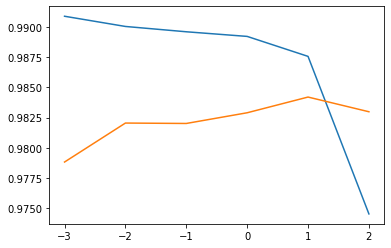

In [34]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

# alpha값을 0.001 ~ 100 까지 10배씩 늘려가며 ridge 회귀 모델 훈련
alpha_list=[0.001,0.01,0.1,1,10,100]
for i in alpha_list:
  ridge=Ridge(alpha=i)
  ridge.fit(train_poly_s_x,train_y)
  train_score.append(ridge.score(train_poly_s_x,train_y))
  test_score.append(ridge.score(test_poly_s_x,test_y))

plt.plot(np.log10(alpha_list),train_score )
plt.plot(np.log10(alpha_list),test_score )
plt.show()

In [35]:
ridge=Ridge(alpha=10)
ridge.fit(train_poly_s_x,train_y)
# train set 에 대해서
Y_PRED_TR=ridge.predict(train_poly_s_x)
print(r2_score(train_y,Y_PRED_TR))
print('rmse : ' , np.sqrt(mean_squared_error(train_y,Y_PRED_TR)))
# test_set에 대해서 
Y_PRED=ridge.predict(test_poly_s_x)
print('r2_score : ', r2_score(test_y,Y_PRED))
print('rmse : ' , np.sqrt(mean_squared_error(test_y,Y_PRED)))

0.9875729121160615
rmse :  38.3756023823027
r2_score :  0.9841995017340579
rmse :  42.900803807068826


In [37]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_poly_s_x,train_y)

# 평가하기 : Metrics
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

# train set 에 대해서
Y_PRED_TR=lasso.predict(train_poly_s_x)
print(r2_score(train_y,Y_PRED_TR))
print('rmse : ' , np.sqrt(mean_squared_error(train_y,Y_PRED_TR)))
# test_set에 대해서 
Y_PRED=lasso.predict(test_poly_s_x)
print('r2_score : ', r2_score(test_y,Y_PRED))
print('rmse : ' , np.sqrt(mean_squared_error(test_y,Y_PRED)))

0.9895576608653113
rmse :  35.17786011945825
r2_score :  0.9821642757021882
rmse :  45.580114658261834


C:\Users\holon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25714.54715165163, tolerance: 521.4272431818183
  model = cd_fast.enet_coordinate_descent(
C:\Users\holon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18641.26676884901, tolerance: 521.4272431818183
  model = cd_fast.enet_coordinate_descent(
C:\Users\holon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3186.141443227978, tolerance: 521.4272431818183
  model = cd_fast.enet_coordinate_descent(
C:\Users\holon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarnin

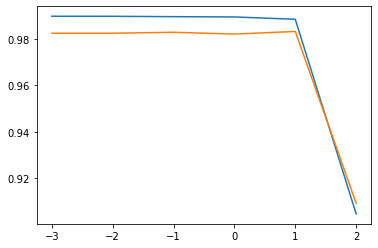

In [38]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

# alpha값을 0.001 ~ 100 까지 10배씩 늘려가며 Lasso 회귀 모델 훈련
alpha_list=[0.001,0.01,0.1,1,10,100]
for i in alpha_list:
  lasso=Lasso(alpha=i)
  lasso.fit(train_poly_s_x,train_y)
  train_score.append(lasso.score(train_poly_s_x,train_y))
  test_score.append(lasso.score(test_poly_s_x,test_y))

plt.plot(np.log10(alpha_list),train_score )
plt.plot(np.log10(alpha_list),test_score )
plt.show()

이 그래프도 왼쪽은 과대적합을 , 오른쪽은 과소적합을 보여줌

Lasso모델 최적 alpha= 1(즉 10) 일 때 입니다.

In [39]:
lasso=Lasso(alpha=10)
lasso.fit(train_poly_s_x,train_y)
# train set 에 대해서
Y_PRED_TR=ridge.predict(train_poly_s_x)
print(r2_score(train_y,Y_PRED_TR))
print('rmse : ' , np.sqrt(mean_squared_error(train_y,Y_PRED_TR)))
# test_set에 대해서 
Y_PRED=ridge.predict(test_poly_s_x)
print('r2_score : ', r2_score(test_y,Y_PRED))
print('rmse : ' , np.sqrt(mean_squared_error(test_y,Y_PRED)))

0.9875729121160615
rmse :  38.3756023823027
r2_score :  0.9841995017340579
rmse :  42.900803807068826


C:\Users\holon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 952.7350205899493, tolerance: 521.4272431818183
  model = cd_fast.enet_coordinate_descent(


### 3. 다항회귀 그래프 시각화
- 다항회귀를 3차까지 실시하고 각 항별로 그래프를 그려 코드와 함께 제출

In [1]:
import pandas as pd
a=[[1,2,3,4,5,6,7,8,9],[5,3,2,3,4,6,10,12,18]]
df12=pd.DataFrame(a)
df13=df12.T
df13.columns=['x','y']

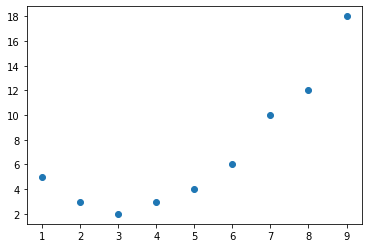

In [2]:
import matplotlib.pyplot as plt
plt.scatter(df13.x,df13.y)
plt.show()

# 비교
# df13.plot('x','y')

- 산점도를 보면 다항회귀식이 필요

In [3]:
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf      # R의 formula 식 유사하게 쓰임

In [4]:
lm = smf.ols(formula='y ~ x', data=df13)
res=lm.fit()
res.summary() 

C:\Users\holon\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     16.99
Date:                Sat, 22 Jan 2022   Prob (F-statistic):            0.00445
Time:                        22:25:17   Log-Likelihood:                -21.732
No. Observations:                   9   AIC:                             47.46
Df Residuals:                       7   BIC:                             47.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1667      2.230     -0.523      0.617      -6.439       4.106
x              1.6333      0.396      4.122      0.004       0.696       2.570
==============================================================================
Omnibus:                        1.451   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.008
Skew:                           0.668   Prob(JB):                        0.604
Kurtosis:                       2.051   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
df13['x2']=df13['x']*df13['x']
lm2 = smf.ols(formula='y ~ x+x2', data=df13)
res2=lm2.fit()
res2.summary() 

C:\Users\holon\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     292.2
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.05e-06
Time:                        22:25:28   Log-Likelihood:                -6.6251
No. Observations:                   9   AIC:                             19.25
Df Residuals:                       6   BIC:                             19.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1667      0.787      9.103      0.000       5.240       9.093
x             -2.9121      0.361     -8.056      0.000      -3.797      -2.028
x2             0.4545      0.035     12.893      0.000       0.368       0.541
==============================================================================
Omnibus:                        0.843   Durbin-Watson:                   3.026
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.023
Skew:                          -0.122   Prob(JB):                        0.989
Kurtosis:                       2.962   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
df13['x3']=df13['x']*df13['x']*df13['x']
lm3 = smf.ols(formula='y ~ x+x2+x3', data=df13)
res3=lm3.fit()
res3.summary() 

C:\Users\holon\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     173.4
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.80e-05
Time:                        22:25:46   Log-Likelihood:                -6.3307
No. Observations:                   9   AIC:                             20.66
Df Residuals:                       5   BIC:                             21.45
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8333      1.418      5.523      0.003       4.188      11.479
x             -3.5505      1.163     -3.053      0.028      -6.540      -0.561
x2             0.6061      0.263      2.302      0.070      -0.071       1.283
x3            -0.0101      0.017     -0.581      0.586      -0.055       0.035
==============================================================================
Omnibus:                        2.246   Durbin-Watson:                   3.278
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                0.518
Skew:                          -0.581   Prob(JB):                        0.772
Kurtosis:                       3.175   Cond. No.                     2.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

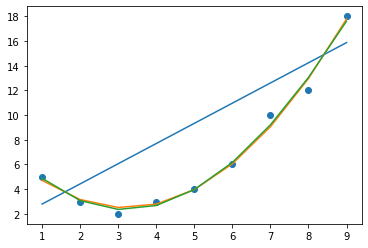

In [9]:
import numpy as np
point=np.arange(1,10)
plt.plot(point, 1.63333333*point+1.16666667)
plt.plot(point, -2.91212121*point+ 0.45454545*point**2+ 7.16666667)
plt.plot(point, -3.55050505*point+0.60606061*point**2+ -0.01010101*point**3+ 7.83333333)
plt.scatter(df13.x,df13.y)
plt.show()

### 4. 이원분산분석(two-way ANOVA)
> - 일원분산분석이 한 처치변수의 수준변화가 결과변수에 미치는 영향력에 관한 것이다.
> - 무작위블럭디장인은 한 처치변수의 수준변화가 결과변수에 미치는 영향력을 조사할  때 외생변수를 블럭으로 처리한 것이다. 그러므로 이 경우도 일원분산분석처럼 엄격히 말해 한 개의 처치변수의 효과를 조사한 것이다.(주효과만 분석) 
> - 이와는 달리 동시에 두개의 처치변수의 수준변화에 따른 결과변수 효과를 조사하는 것
> - 처치효과로 주효과와 상호작용효로 나누어 볼수 있다(둘다 분석)
>> - 주효과 : 각 처치변수의 변화가 결과변수에 미치는 영향에 관한 것
>> - 상호작용효과 : 한 처치변수가 다른 처치변수의 변화에 따라 결과변수에 미치는 영향에 관한 것, 상호작용효과가 유의한 경우 주효과는 해석하지 않는다. 무의미한 경우 주효과를 해석한다. 

> - 해석
>> - 상호작용효과가 유의하지 않으면 주효과를 해석  
>> - 상호작용효과가 유의하면 주효과는 해석 않함

##  예제 (이학식 마케팅 조사론 p321) : 성별과 여행빈도가 해외여행태도에 미치는 영향 조사
>> -  여행빈도 3범주 , 남녀 나눠 조사. 총 30명
>> - 성별(남 1, 여2), 여행빈도(적음 1, 중간 2, 많음 3), 해외여행 태도( 전혀 좋아하지 않음 1, 매우 좋아함 9)

>> - 여행빈도와 성별간에 대한 가설 : 상호작용효과
>>> - 귀무가설 : 상호작용효과 없다
>>> - 대립가설 : 상호작용효과 있다..
>> - 여행빈도와 여행태도간에 대한 가설 : 주효과 1
>>> - 귀무가설 : 여행빈도와 평균 여행태도점수간에 차이 없다
>>> - 대립가설 : 차이 있다..
>> - 성별과 여행태도간에 대한 가설 : 주효과 2
>>> - 귀무가설 :  성별과 평균 여행태도점수간에 차이 없다
>>> - 대립가설 : 차이 있다..

In [18]:
b=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2],
   [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3],
   [2,3,4,4,2,4,5,5,3,3,8,9,8,7,7,6,7,6,5,7,3,4,5,4,5,6,6,6,7,8]]
df10=pd.DataFrame(b)
df11=df10.T
df11.columns=['sex','travel','points']
df11.head()

,sex,travel,points
0,1,1,2
1,1,1,3
2,1,1,4
3,1,1,4
4,1,1,2


<AxesSubplot:title={'center':'points'}, xlabel='travel'>

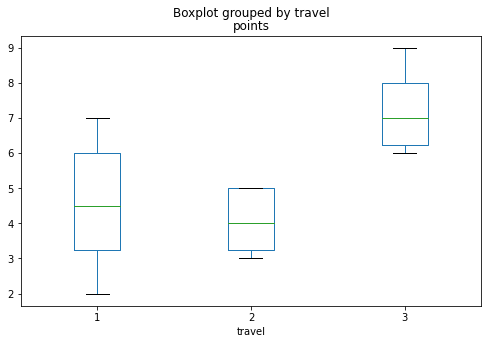

In [19]:
# 여행빈도별 태도점수 plot 만들기
df11.boxplot(column = 'points', by='travel' , grid = False, figsize=(8,5))

<AxesSubplot:title={'center':'points'}, xlabel='sex'>

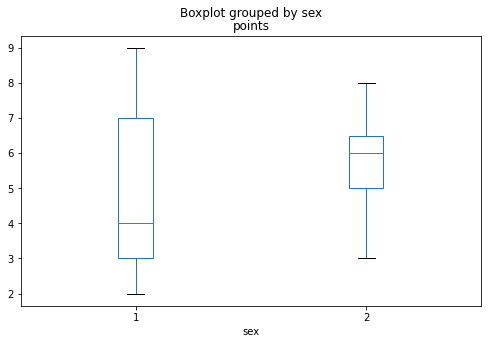

In [20]:
# 남녀별 태도점수 plot 만들기
df11.boxplot(column = 'points', by='sex' , grid = False, figsize=(8,5))

In [21]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'points ~ C(travel) + C(sex) + C(travel):C(sex)'
model4 = ols(formula, df11).fit()
table=anova_lm(model4)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(travel),2.0,55.400000,27.700000,33.918367,1.014700e-07
C(sex),1.0,4.033333,4.033333,4.938776,3.593950e-02
C(travel):C(sex),2.0,25.266667,12.633333,15.469388,4.830446e-05
Residual,24.0,19.600000,0.816667,NaN,NaN


- 유의수준 0.05에서 p값이 거의 0(4.830446e-05)이므로 귀무가설은 기각되고 따라서 상호작용효과가 있는 것으로 결론

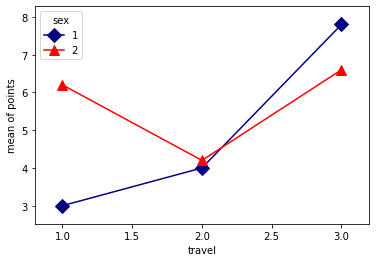

In [22]:
# 상호작용효과 그래프

from statsmodels.graphics.factorplots import interaction_plot
fig=interaction_plot(df11.travel,df11.sex,df11.points, colors=['navy','red'],
                     markers=['D','^'],ms=10)

#### - 남녀간의 기울기 다르므로 상호작용효과가 있다. 여행빈도가 적을 때는 남녀간 태도차이가 크게 나타나나 빈도가 많아지면서 차이가 적어짐 남성의 경우 빈도가 많을수록 긍정적 태도가 비례적으로 증가
#### - 상호작용효과가 있으므로 주효과는 해석 않함 